In [1]:
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import itertools
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [2]:
df=pd.read_csv('teleCust1000t.csv')

In [3]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [6]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

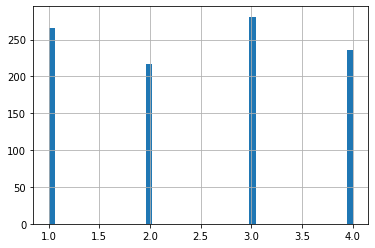

In [10]:
df['custcat'].hist(bins=50)

In [8]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [12]:
x=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values

In [17]:
print(type(x))
print(x.dtype)

<class 'numpy.ndarray'>
float64


In [41]:
y=df['custcat'].values

In [30]:
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
print(x)

[[-0.02696767 -1.055125    0.18450456 ... -0.22207644 -1.03459817
  -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243 ... -0.22207644 -1.03459817
   2.55666158]
 [ 1.19883553  1.52109247  0.82182601 ... -0.22207644  0.96655883
  -0.23065004]
 ...
 [ 1.19883553  1.47425216  1.37948227 ... -0.22207644  0.96655883
  -0.92747794]
 [ 1.19883553  1.61477311  0.58283046 ... -0.22207644  0.96655883
  -0.92747794]
 [ 1.19883553  0.67796676 -0.45281689 ... -0.22207644  0.96655883
   0.46617787]]


In [42]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=4)

In [45]:
print(train_x.shape,test_x.shape)

(750, 11) (250, 11)


In [43]:
print(train_y.shape,test_y.shape)

(750,) (250,)


In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
k=4
neighbor=KNeighborsClassifier(n_neighbors=k).fit(train_x,train_y)

In [48]:
pred_y=neighbor.predict(test_x)
print(pred_y)

[1 1 3 2 4 3 3 2 2 4 1 4 3 1 3 1 4 4 3 4 3 3 3 1 1 3 1 1 1 4 1 1 4 4 3 2 3
 1 2 3 3 4 2 1 4 1 4 1 4 4 2 1 2 3 2 3 3 3 1 1 1 4 2 3 2 1 1 2 2 1 1 3 4 3
 2 1 4 2 2 3 3 1 2 4 4 2 3 4 1 1 2 2 1 1 1 1 2 2 4 1 2 4 1 1 1 4 2 2 2 2 1
 3 2 4 1 2 1 1 2 3 4 2 2 3 1 1 2 3 1 3 3 1 1 4 2 2 2 1 1 3 1 1 4 1 1 2 1 3
 2 2 1 2 2 3 2 3 3 3 3 2 2 1 1 1 3 4 4 1 3 1 3 1 1 2 2 2 1 4 1 1 1 2 1 3 3
 1 2 1 4 4 3 1 1 3 3 1 1 3 3 3 3 3 3 1 2 1 3 1 1 2 1 3 2 1 3 3 1 2 1 1 4 3
 2 2 4 2 1 4 4 1 4 3 1 2 2 2 1 2 4 1 3 4 4 4 3 3 4 1 2 2]


In [49]:
from sklearn import metrics
print(metrics.accuracy_score(test_y,pred_y))

0.332


In [55]:
ks=20
mean_acc=np.zeros((ks))
std_acc=np.zeros((ks))
for i in range(1,ks+1):
    neighbor=KNeighborsClassifier(n_neighbors=i).fit(train_x,train_y)
    pred_y=neighbor.predict(test_x)
    mean_acc[i-1]=metrics.accuracy_score(test_y,pred_y)
    std_acc[i-1]=np.std(pred_y==test_y)/np.sqrt(pred_y.shape[0])
mean_acc

array([0.296, 0.3  , 0.304, 0.332, 0.34 , 0.316, 0.356, 0.332, 0.356,
       0.344, 0.344, 0.348, 0.344, 0.364, 0.336, 0.356, 0.356, 0.336,
       0.328, 0.336])

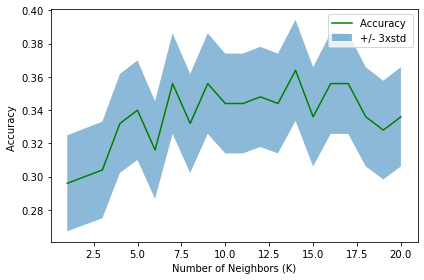

In [59]:
plt.plot(range(1,ks+1),mean_acc,'g')
plt.fill_between(range(1,ks+1),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.510)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()